In [354]:
import time
import pandas as pd
import numpy as np

# Load and Format Data

## CRSP/COMPUSTAT Merged

In [348]:
# Load Data
CRSP_COMPUSTAT_MERGED = pd.read_csv('Data/CRSP_COMPUSTAT_MERGED.csv')
CRSP_COMPUSTAT_MERGED.head()

,GVKEY,LPERMNO,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,...,ceqq,cheq,ltq,niq,cik,costat,conml,dlrsn,sic,dldte
0,1000,25881,12/31/1970,1970,4.0,INDL,C,D,STD,AE.2,...,10.544,NaN,NaN,-1.064,NaN,I,A & E Plastik Pak Inc,9.0,3089,06/30/1978
1,1000,25881,03/31/1971,1971,1.0,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,0.346,NaN,I,A & E Plastik Pak Inc,9.0,3089,06/30/1978
2,1000,25881,06/30/1971,1971,2.0,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,0.152,NaN,I,A & E Plastik Pak Inc,9.0,3089,06/30/1978
3,1000,25881,09/30/1971,1971,3.0,INDL,C,D,STD,AE.2,...,NaN,NaN,NaN,-0.672,NaN,I,A & E Plastik Pak Inc,9.0,3089,06/30/1978
4,1000,25881,12/31/1971,1971,4.0,INDL,C,D,STD,AE.2,...,8.381,2.557,20.949,-2.144,NaN,I,A & E Plastik Pak Inc,9.0,3089,06/30/1978


In [349]:
# Split Up 'datacqtr' into calendar year and quarter
CRSP_COMPUSTAT_MERGED['CalendarYear'] = CRSP_COMPUSTAT_MERGED['datacqtr'].str.slice(0,4)
CRSP_COMPUSTAT_MERGED['Quarter'] = CRSP_COMPUSTAT_MERGED['datacqtr'].str.slice(4)

# Convert Quarters to Pandas Datetimes
CRSP_COMPUSTAT_MERGED['datacqtr_formatted'] = CRSP_COMPUSTAT_MERGED["CalendarYear"] + "-" + CRSP_COMPUSTAT_MERGED["Quarter"]
CRSP_COMPUSTAT_MERGED['QuarterStart'] = pd.PeriodIndex(CRSP_COMPUSTAT_MERGED['datacqtr_formatted'], freq='Q').to_timestamp()

# Calculate Start of Quarter and End of Quarter Dates
CRSP_COMPUSTAT_MERGED['QuarterEnd'] = CRSP_COMPUSTAT_MERGED['QuarterStart'] + pd.offsets.MonthEnd(3)
CRSP_COMPUSTAT_MERGED['QuarterStart_Month'] = CRSP_COMPUSTAT_MERGED['QuarterStart'].dt.to_period('m')
CRSP_COMPUSTAT_MERGED['QuarterEnd_Month'] = CRSP_COMPUSTAT_MERGED['QuarterEnd'].dt.to_period('m')

# Calculate Lagged Dates (Year-Month)
CRSP_COMPUSTAT_MERGED['Date_Lag2'] = CRSP_COMPUSTAT_MERGED['QuarterEnd_Month'] + 2
CRSP_COMPUSTAT_MERGED['Date_Lag3'] = CRSP_COMPUSTAT_MERGED['QuarterEnd_Month'] + 3
CRSP_COMPUSTAT_MERGED['Date_Lag4'] = CRSP_COMPUSTAT_MERGED['QuarterEnd_Month'] + 4
CRSP_COMPUSTAT_MERGED.head()

,GVKEY,LPERMNO,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,...,CalendarYear,Quarter,datacqtr_formatted,QuarterStart,QuarterEnd,QuarterStart_Month,QuarterEnd_Month,Date_Lag2,Date_Lag3,Date_Lag4
0,1000,25881,12/31/1970,1970,4.0,INDL,C,D,STD,AE.2,...,1970,Q4,1970-Q4,1970-10-01,1970-12-31,1970-10,1970-12,1971-02,1971-03,1971-04
1,1000,25881,03/31/1971,1971,1.0,INDL,C,D,STD,AE.2,...,1971,Q1,1971-Q1,1971-01-01,1971-03-31,1971-01,1971-03,1971-05,1971-06,1971-07
2,1000,25881,06/30/1971,1971,2.0,INDL,C,D,STD,AE.2,...,1971,Q2,1971-Q2,1971-04-01,1971-06-30,1971-04,1971-06,1971-08,1971-09,1971-10
3,1000,25881,09/30/1971,1971,3.0,INDL,C,D,STD,AE.2,...,1971,Q3,1971-Q3,1971-07-01,1971-09-30,1971-07,1971-09,1971-11,1971-12,1972-01
4,1000,25881,12/31/1971,1971,4.0,INDL,C,D,STD,AE.2,...,1971,Q4,1971-Q4,1971-10-01,1971-12-31,1971-10,1971-12,1972-02,1972-03,1972-04


<AxesSubplot:xlabel='CalendarYear'>

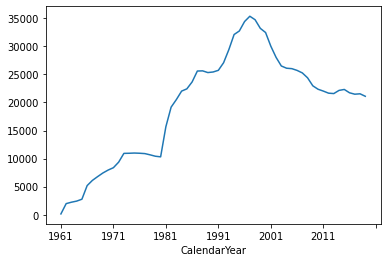

In [418]:
CRSP_COMPUSTAT_MERGED.groupby(['CalendarYear'])['LPERMNO'].count().plot()

## CRSP (Monthly)

In [375]:
# Read in Dataframe
CRSP_MONTHLY = pd.read_csv('Data/CRSP_MONTHLY.csv')

# Convert to Datetime
CRSP_MONTHLY['date'] = pd.to_datetime(CRSP_MONTHLY['date'])

# Convert Date to Month Period
CRSP_MONTHLY['date_month'] = CRSP_MONTHLY['date'].dt.to_period('m')

# Filter Out 6000 Range SIC Companies (Financial and ETFs)
CRSP_MONTHLY['SICCD'] = pd.to_numeric(CRSP_MONTHLY['SICCD'], errors='coerce')
CRSP_MONTHLY = CRSP_MONTHLY[(CRSP_MONTHLY['SICCD']<6000) |  (CRSP_MONTHLY['SICCD']>=7000)]

CRSP_MONTHLY.head()

C:\Users\jorda\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERMNO,date,SICCD,PRC,SHROUT,CFACPR,date_month
1,10000,1986-01-31,3990.0,-4.37500,3680.0,1.0,1986-01
2,10000,1986-02-28,3990.0,-3.25000,3680.0,1.0,1986-02
3,10000,1986-03-31,3990.0,-4.43750,3680.0,1.0,1986-03
4,10000,1986-04-30,3990.0,-4.00000,3793.0,1.0,1986-04
5,10000,1986-05-30,3990.0,-3.10938,3793.0,1.0,1986-05


<AxesSubplot:xlabel='date_month'>

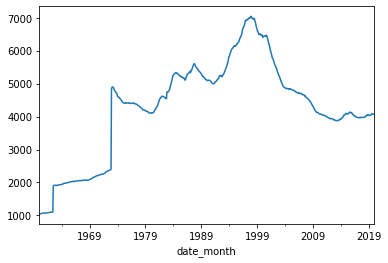

In [419]:
CRSP_MONTHLY.groupby(['date_month'])['PERMNO'].count().plot()

## CRSP (Daily)

In [356]:
# starting time
start = time.time()

# Load In Data
CRSP_DAILY = pd.read_csv('Data/CRSP_DAILY.csv')

# end time
end = time.time()

# total time taken
print(f"Runtime for loading data is {end - start}")

Runtime for loading data is 41.91728162765503


In [365]:
# Change to numeric
CRSP_DAILY['RET'] = pd.to_numeric(CRSP_DAILY['RET'], errors='coerce')

## Sigma Calculation

In [369]:
window=90
CRSP_DAILY['SIGMA'] = ((((CRSP_DAILY['RET'].copy()**2).rolling(window).sum())/(window-1))*252)**(1/2)
CRSP_DAILY.head()

,PERMNO,date,RET,SIGMA
0,10000,01/06/1986,NaN,NaN
1,10000,01/07/1986,NaN,NaN
2,10000,01/08/1986,-0.02439,NaN
3,10000,01/09/1986,0.00000,NaN
4,10000,01/10/1986,0.00000,NaN


<AxesSubplot:xlabel='date'>

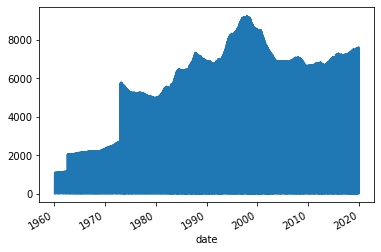

In [420]:
CRSP_DAILY.groupby(['date'])['PERMNO'].count().plot()

## Format Daily Data from Merge

In [370]:
# Convert to Datetime
CRSP_DAILY['date'] = pd.to_datetime(CRSP_DAILY['date'])

# Convert Date to Month Period
CRSP_DAILY['date_month'] = CRSP_DAILY['date'].dt.to_period('m')

# Keep Only Last Day of Month
#CRSP_DAILY['EndOfMonth'] = CRSP_DAILY['date'] + pd.offsets.MonthEnd(0)
#CRSP_DAILY = CRSP_DAILY[CRSP_DAILY['date']==CRSP_DAILY['EndOfMonth']]

lastDayOfMonthInfo = CRSP_DAILY.groupby(['PERMNO', 'date_month'])['date'].max().reset_index()
lastDayOfMonthInfo = lastDayOfMonthInfo.rename(columns={'date': 'lastDayOfMonth'})
temp = pd.merge(CRSP_DAILY,
                lastDayOfMonthInfo,
                left_on=['PERMNO', 'date_month'],
                right_on=['PERMNO', 'date_month']
)
CRSP_DAILY = temp.copy()
CRSP_DAILY = CRSP_DAILY[CRSP_DAILY['date'] == CRSP_DAILY['lastDayOfMonth']]
CRSP_DAILY.head()

,PERMNO,date,RET,SIGMA,date_month,lastDayOfMonth
19,10000,1986-01-31,-0.014085,NaN,1986-01,1986-01-31
38,10000,1986-02-28,0.000000,NaN,1986-02,1986-02-28
58,10000,1986-03-31,0.007092,NaN,1986-03,1986-03-31
80,10000,1986-04-30,-0.015385,NaN,1986-04,1986-04-30
101,10000,1986-05-30,0.015306,0.718449,1986-05,1986-05-30


## SP500 Data

In [387]:
# Read in Data
SP500_MONTHLY = pd.read_csv('Data/SP500_MONTHLY.csv')

# Format caldt as datetime
SP500_MONTHLY['caldt'] = pd.to_datetime(SP500_MONTHLY['caldt'])

# Convert Date to Month Period
SP500_MONTHLY['date_month'] = SP500_MONTHLY['caldt'].dt.to_period('m')

# Adjust totval (quoted in $1000s)
SP500_MONTHLY['totval'] = SP500_MONTHLY['totval']*1000

# Drop caldt
SP500_MONTHLY = SP500_MONTHLY.drop(columns=['caldt'])

# Rename Columns (to make later merge simpler)
SP500_MONTHLY = SP500_MONTHLY.rename(columns={'vwretd': 'vwretdSP500', 'totval': 'totvalSP500'})

SP500_MONTHLY.head()

,vwretdSP500,totvalSP500,date_month
0,-0.069933,2.379253e+11,1960-01
1,0.013922,2.402697e+11,1960-02
2,-0.012566,2.367135e+11,1960-03
3,-0.016113,2.326994e+11,1960-04
4,0.033513,2.392876e+11,1960-05


# Merge Dataframes

## Merge CRSP/COMPUSTAT Merged Data set with CRSP (Monthly)

In [388]:
# Select Accounting Features to Merge into CRSP Monthly Dataframe
CRSP_COMPUSTAT_features = ['atq', 'ceqq', 'cheq', 'ltq', 'niq']

# Select Features to Keep after Merge
featuresToKeep = ['PERMNO', 'date_month', 'PRC', 'SHROUT', 'CFACPR']

# Add Accounting Features to Features to keep after merge
featuresToKeep.extend(CRSP_COMPUSTAT_features)

# Add Lagged Accounting Features
for lag in range(2,5):
    CRSP_COMPUSTAT_merge_features = ['LPERMNO', f'Date_Lag{lag}']
    CRSP_COMPUSTAT_merge_features.extend(CRSP_COMPUSTAT_features)
    if lag==2:
        temp = pd.merge(CRSP_COMPUSTAT_MERGED[CRSP_COMPUSTAT_merge_features],
                                 CRSP_MONTHLY[['PERMNO', 'date_month', 'PRC', 'SHROUT', 'CFACPR']],
                                 how='right',
                                 left_on=['LPERMNO', f'Date_Lag{lag}'],
                                 right_on=['PERMNO', 'date_month']
                                )
        temp = temp[featuresToKeep]
        
    else:
        temp = pd.merge(CRSP_COMPUSTAT_MERGED[CRSP_COMPUSTAT_merge_features],
                                 temp[featuresToKeep],
                                 how='right',
                                 left_on=['LPERMNO', f'Date_Lag{lag}'],
                                 right_on=['PERMNO', 'date_month'],
                        suffixes=('', '_y')
                                )
                      
        # Update Features
        for feature in CRSP_COMPUSTAT_features:
            temp[feature] = temp[feature].fillna(temp[f'{feature}_y'])
            temp = temp.drop([f'{feature}_y'], 1)
        
        temp = temp[featuresToKeep]

explanatoryDataFrame = temp.copy()        
explanatoryDataFrame[:10]

,PERMNO,date_month,PRC,SHROUT,CFACPR,atq,ceqq,cheq,ltq,niq
0,10000,1986-01,-4.37500,3680.0,1.0,NaN,NaN,NaN,NaN,NaN
1,10000,1986-02,-3.25000,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132
2,10000,1986-03,-4.43750,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132
3,10000,1986-04,-4.00000,3793.0,1.0,1.265,0.689,0.743,0.576,-0.132
4,10000,1986-05,-3.10938,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484
5,10000,1986-06,-3.09375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484
6,10000,1986-07,-2.84375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484
7,10000,1986-08,-1.09375,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132
8,10000,1986-09,-1.03125,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132
9,10000,1986-10,-0.78125,3843.0,1.0,1.311,0.289,0.425,1.022,-0.132


In [389]:
explanatoryDataFrame.shape

(3078560, 10)

## Merge Existing Explanatory Data set with CRSP (Daily)

In [390]:
explanatoryDataFrame = pd.merge(explanatoryDataFrame,
                CRSP_DAILY[['PERMNO', 'date_month', 'SIGMA']],
                how='left',
                left_on=['PERMNO', 'date_month'],
                right_on=['PERMNO', 'date_month']
               )
explanatoryDataFrame[:10]

,PERMNO,date_month,PRC,SHROUT,CFACPR,atq,ceqq,cheq,ltq,niq,SIGMA
0,10000,1986-01,-4.37500,3680.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10000,1986-02,-3.25000,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN
2,10000,1986-03,-4.43750,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN
3,10000,1986-04,-4.00000,3793.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN
4,10000,1986-05,-3.10938,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.718449
5,10000,1986-06,-3.09375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.520684
6,10000,1986-07,-2.84375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.509575
7,10000,1986-08,-1.09375,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132,0.934086
8,10000,1986-09,-1.03125,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132,0.973039
9,10000,1986-10,-0.78125,3843.0,1.0,1.311,0.289,0.425,1.022,-0.132,1.013245


In [391]:
explanatoryDataFrame.shape

(3078560, 11)

## Merge Existing Explanatory Data Set with SP500 Monthly

In [392]:
explanatoryDataFrame = pd.merge(explanatoryDataFrame,
                SP500_MONTHLY,
                how='left',
                left_on=['date_month'],
                right_on=['date_month']
               )
explanatoryDataFrame[:10]

,PERMNO,date_month,PRC,SHROUT,CFACPR,atq,ceqq,cheq,ltq,niq,SIGMA,vwretdSP500,totvalSP500
0,10000,1986-01,-4.37500,3680.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004706,1.484606e+12
1,10000,1986-02,-3.25000,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN,0.076525,1.589623e+12
2,10000,1986-03,-4.43750,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN,0.055832,1.671574e+12
3,10000,1986-04,-4.00000,3793.0,1.0,1.265,0.689,0.743,0.576,-0.132,NaN,-0.013348,1.642761e+12
4,10000,1986-05,-3.10938,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.718449,0.055326,1.724749e+12
5,10000,1986-06,-3.09375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.520684,0.015744,1.748550e+12
6,10000,1986-07,-2.84375,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,0.509575,-0.057541,1.652189e+12
7,10000,1986-08,-1.09375,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132,0.934086,0.074417,1.772686e+12
8,10000,1986-09,-1.03125,3793.0,1.0,1.311,0.289,0.425,1.022,-0.132,0.973039,-0.083243,1.617007e+12
9,10000,1986-10,-0.78125,3843.0,1.0,1.311,0.289,0.425,1.022,-0.132,1.013245,0.056538,1.700191e+12


In [393]:
explanatoryDataFrame.shape

(3078560, 13)

# Remaining Explanatory Variable Calculations

## NITA

In [394]:
# Precomuputations
explanatoryDataFrame['ME'] = explanatoryDataFrame['PRC'] * explanatoryDataFrame['SHROUT']
explanatoryDataFrame['BE'] = explanatoryDataFrame['ceqq']
explanatoryDataFrame['TA'] = explanatoryDataFrame['atq']

# Total Assets Adjusted Calculation
explanatoryDataFrame['totalAssetsAdj'] = explanatoryDataFrame['TA'] + 0.1*(explanatoryDataFrame['ME'] - explanatoryDataFrame['BE'])

# NITA Calculation
explanatoryDataFrame['NITA'] = explanatoryDataFrame['niq'] / explanatoryDataFrame['totalAssetsAdj']

## NIMTA

In [395]:
# NIMTA Calculation
explanatoryDataFrame['NIMTA'] = explanatoryDataFrame['niq'] / (explanatoryDataFrame['ME'] + explanatoryDataFrame['ltq'])

## TLTA

In [396]:
explanatoryDataFrame['TLTA'] = explanatoryDataFrame['ltq'] / explanatoryDataFrame['totalAssetsAdj']

## TLMTA

In [397]:
explanatoryDataFrame['TLMTA'] = explanatoryDataFrame['ltq'] / (explanatoryDataFrame['ME'] + explanatoryDataFrame['ltq'])

## EXRET

In [398]:
explanatoryDataFrame['adjPRC'] = explanatoryDataFrame['PRC'] * explanatoryDataFrame['CFACPR']
explanatoryDataFrame['RET'] = explanatoryDataFrame['adjPRC'].shift(1) / explanatoryDataFrame['adjPRC'] - 1
explanatoryDataFrame['EXRET'] = np.log(1+explanatoryDataFrame['RET']) - np.log(1+explanatoryDataFrame['vwretdSP500'])

# Drop -inf values for EXRET

c:\users\jorda\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\jorda\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## RSIZE

In [399]:
explanatoryDataFrame['RSIZE'] = np.log(explanatoryDataFrame['ME'] / explanatoryDataFrame['totvalSP500'])

## CASHMTA

In [400]:
explanatoryDataFrame['CASHMTA'] = explanatoryDataFrame['cheq'] / (explanatoryDataFrame['ME'] + explanatoryDataFrame['ltq'])

In [401]:
explanatoryDataFrame.head()

,PERMNO,date_month,PRC,SHROUT,CFACPR,atq,ceqq,cheq,ltq,niq,...,totalAssetsAdj,NITA,NIMTA,TLTA,TLMTA,adjPRC,RET,EXRET,RSIZE,CASHMTA
0,10000,1986-01,-4.37500,3680.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-4.37500,NaN,NaN,NaN,NaN
1,10000,1986-02,-3.25000,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,...,-1194.803900,0.000110,0.000011,-0.000482,-0.000048,-3.25000,0.346154,0.223513,NaN,-0.000062
2,10000,1986-03,-4.43750,3680.0,1.0,1.265,0.689,0.743,0.576,-0.132,...,-1631.803900,0.000081,0.000008,-0.000353,-0.000035,-4.43750,-0.267606,-0.365765,NaN,-0.000046
3,10000,1986-04,-4.00000,3793.0,1.0,1.265,0.689,0.743,0.576,-0.132,...,-1516.003900,0.000087,0.000009,-0.000380,-0.000038,-4.00000,0.109375,0.117235,NaN,-0.000049
4,10000,1986-05,-3.10938,3793.0,1.0,1.284,0.578,0.395,0.706,-0.484,...,-1178.161634,0.000411,0.000041,-0.000599,-0.000060,-3.10938,0.286430,0.198021,NaN,-0.000033


In [403]:
explanatoryDataFrame.size

80042560

In [414]:
explanatoryDataFrame['PERMNO'].value_counts().plot('bar')

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.

<AxesSubplot:xlabel='date_month'>

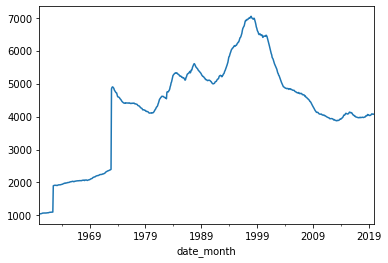

In [417]:
explanatoryDataFrame.groupby(['date_month'])['PERMNO'].count().plot()